Assignment: Image Classification Using Neuron

In [1]:
# Change the datsets shape
# Add extra neuron with activation function "Relu" don't use "tanh" activation function
# Submit it on your gitHub repository

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [4]:
from sklearn.model_selection import train_test_split
import os
os.getcwd()

'C:\\Users\\karim Suzon\\Downloads\\Deep Learning'

In [5]:
np.random.seed(1)

In [6]:
train_images = []
train_labels = []
shape = (224, 224)

train_datasets_path = "datasets/train_zip/train/"

for filename in os.listdir("datasets/train_zip/train/"):
    if filename.split('.')[1] =='jpg':
        img = cv2.imread(os.path.join(train_datasets_path, filename))
        train_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        train_images.append(img)
        
        
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, random_state=1)

In [8]:
test_images = []
test_labels = []
shape = (224, 224)

test_datasets_path = "datasets/test_zip/test/"

for filename in os.listdir("datasets/test_zip/test/"):
    if filename.split('.')[1] =='jpg':
        img = cv2.imread(os.path.join(test_datasets_path, filename))
        test_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
        
        
test_images = np.array(test_images)

Models

In [14]:
model = Sequential()
# 1st / Input Layer
model.add(Conv2D(kernel_size = (3, 3), filters = 32, activation = 'relu', input_shape = (224, 224, 3)))


# 1st Hidden Layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

# 2nd Hidden Layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

# Bridge Layer
model.add(Flatten())

# Output Layer

model.add(Dense(40, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))


In [15]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
             metrics = ['acc'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 373248)           

In [17]:
model_data  = model.fit(x_train, 
                        y_train,
                       epochs=5,
                       batch_size = 50,
                       validation_data=(x_test, y_test))

Epoch 1/5
4/4 [==============================] - 35s 9s/step - loss: 573.5573 - acc: 0.2611 - val_loss: 84.1042 - val_acc: 0.2500
Epoch 2/5
4/4 [==============================] - 34s 9s/step - loss: 36.8483 - acc: 0.3333 - val_loss: 8.7200 - val_acc: 0.6000
Epoch 3/5
4/4 [==============================] - 34s 8s/step - loss: 8.9741 - acc: 0.4833 - val_loss: 2.0721 - val_acc: 0.5667
Epoch 4/5
4/4 [==============================] - 34s 9s/step - loss: 1.2920 - acc: 0.6056 - val_loss: 0.6477 - val_acc: 0.7667
Epoch 5/5
4/4 [==============================] - 34s 8s/step - loss: 0.4870 - acc: 0.8167 - val_loss: 0.6446 - val_acc: 0.8833


In [18]:
model_evaluate = model.evaluate(x_test, y_test)

2/2 [==============================] - 3s 1s/step - loss: 0.6446 - acc: 0.8833


In [19]:
print(model_evaluate)

[0.6445702910423279, 0.8833333253860474]


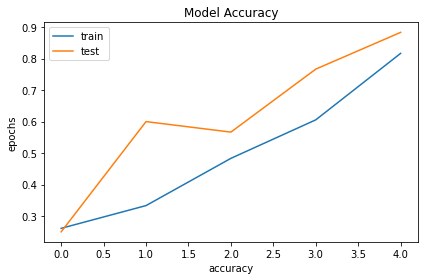

In [20]:
plt.plot(model_data.history['acc'])
plt.plot(model_data.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

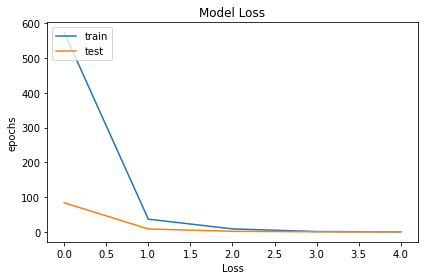

In [21]:
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel('epochs')
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [22]:
image_name = test_images[0:1]
label_names = test_labels[0:1]

predicted = model.predict(np.array(image_name))
output = {0: 'apple', 
         1: "banana",
         2: 'mixed',
         3: 'orange'}


print("Actual values names: \t", label_names)
print("Pridicted Values names: \t", output[np.argmax(predicted)])

Actual values names: 	 ['apple']
Pridicted Values names: 	 apple


Summary

In [23]:
# new datasets shape (224, 224)
# Dense values (40,25, 4)
# Activation function "relu" has been used.
# Result: Acctual values and predicted values are same.